
# Real Estate

### About Data
#### Y house price of unit area
#### X6 longitude
#### X5 latitude
#### X4 number of convenience stores
#### X3 distance to the nearest MRT station
#### X2 house age
#### X1 transaction date

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from wordcloud import WordCloud

init_notebook_mode(connected=True) 

import warnings
warnings.filterwarnings('ignore')

### Reading and Vizualitation Data

In [2]:
df_realestate=pd.read_excel('realestate.xlsx')

In [3]:
df_realestate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
X1    414 non-null float64
X2    414 non-null float64
X3    414 non-null float64
X4    414 non-null int64
X5    414 non-null float64
X6    414 non-null float64
Y     414 non-null float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [4]:
df_realestate.head()

,X1,X2,X3,X4,X5,X6,Y
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
print(" Total Row Number: {0} \n Total Col Number: {1}".format(df_realestate.shape[0], df_realestate.shape[1]))

 Total Row Number: 414 
 Total Col Number: 7


 -----------  Summary Statistic  ---------

In [7]:
df_realestate.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,414.0,2013.148953,0.281995,2012.666667,2012.916667,2013.166667,2013.416667,2013.583333
X2,414.0,17.712560,11.392485,0.000000,9.025000,16.100000,28.150000,43.800000
X3,414.0,1083.885689,1262.109595,23.382840,289.324800,492.231300,1454.279000,6488.021000
X4,414.0,4.094203,2.945562,0.000000,1.000000,4.000000,6.000000,10.000000
X5,414.0,24.969030,0.012410,24.932070,24.963000,24.971100,24.977455,25.014590
X6,414.0,121.533361,0.015347,121.473530,121.528085,121.538630,121.543305,121.566270
Y,414.0,37.980193,13.606488,7.600000,27.700000,38.450000,46.600000,117.500000


In [8]:
cdf=df_realestate[['X2','X3','X4','X5','X6','Y']]
cdf.head()

,X2,X3,X4,X5,X6,Y
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


#### Plot data untuk melihat linear tidaknya variabel 
---------------------Y versus X2,X3,X4,X5 dan X6-----------------------------------

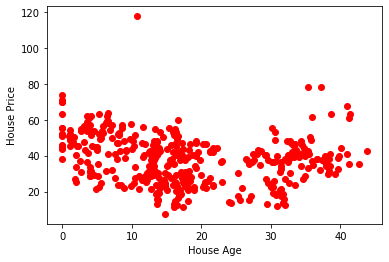

In [9]:
plt.scatter(cdf.X2, cdf.Y,  color='red')
plt.xlabel("House Age")
plt.ylabel("House Price")
plt.show()

Dapat dilihat bahwa usia rumah tidak berkorelasi dengan harga rumah

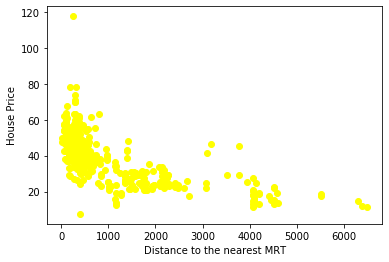

In [10]:
plt.scatter(cdf.X3, cdf.Y,  color='yellow')
plt.xlabel("Distance to the nearest MRT")
plt.ylabel("House Price")
plt.show()

Adanya indikasi bahwa adanya hubungan/korelasi antara jarak terdekat MRT dengan harga rumah

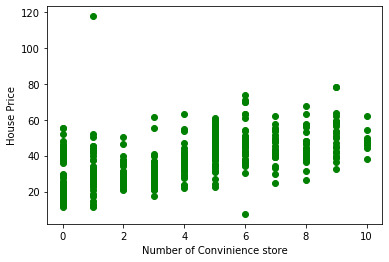

In [11]:
plt.scatter(cdf.X4, cdf.Y,  color='green')
plt.xlabel("Number of Convinience store")
plt.ylabel("House Price")
plt.show()

Dapat dilihat bahwa tidak adanya korelasi antara banyaknya toko dengan harga rumah

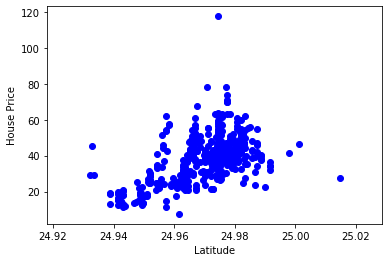

In [12]:
plt.scatter(cdf.X5, cdf.Y,  color='blue')
plt.xlabel("Latitude")
plt.ylabel("House Price")
plt.show()

Dapat dilihat bahwa adanya korelasi antara garis lintang dengan harga rumah

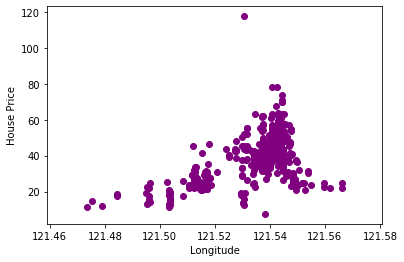

In [13]:
plt.scatter(cdf.X6, cdf.Y,  color='purple')
plt.xlabel("Longitude")
plt.ylabel("House Price")
plt.show()

Dapat dilihat bahwa adanya korelasi antara garis bujur dengan harga rumah

Text(0, 0.5, 'House Price')

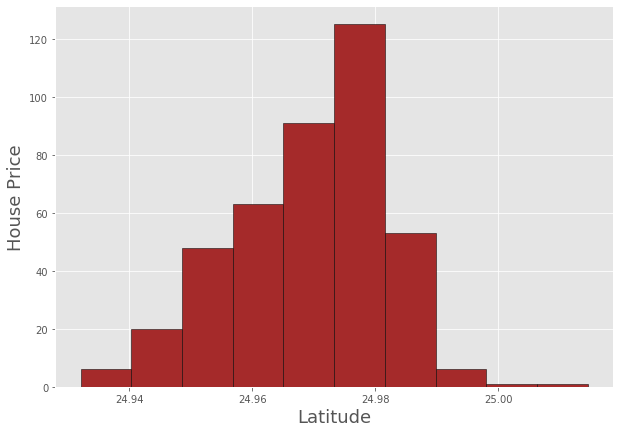

In [15]:
#karena garis lintang dan bujur merupakan variabel kontinu maka kita juga dapat melihat visualisasi 
#garis lintang dan bujur dengan menggunakan Histogram

plt.style.use('ggplot')
# Histogram of the latitude
cdf.X5.plot(kind='hist',color='brown',edgecolor='black',figsize=(10,7))
plt.xlabel('Latitude', size=18)
plt.ylabel('House Price', size=18)

Text(0, 0.5, 'House Price')

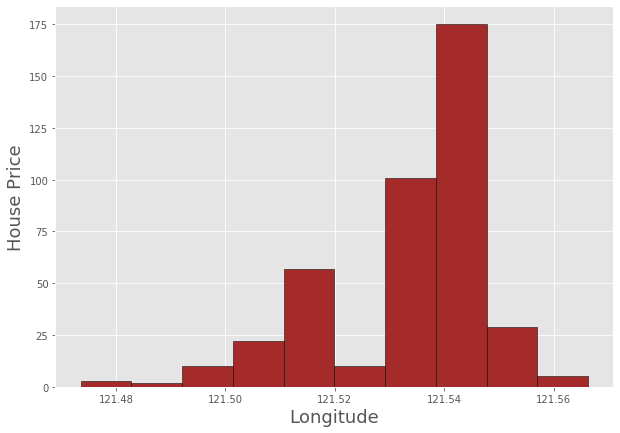

In [16]:
plt.style.use('ggplot')
# Histogram of the longitude
cdf.X6.plot(kind='hist',color='brown',edgecolor='black',figsize=(10,7))
plt.xlabel('Longitude', size=18)
plt.ylabel('House Price', size=18)

In [24]:
#Visualisasi korelasi untuk semua variabel X terhadap variabel Y kita juga dapat melihatnya melalui Headmap

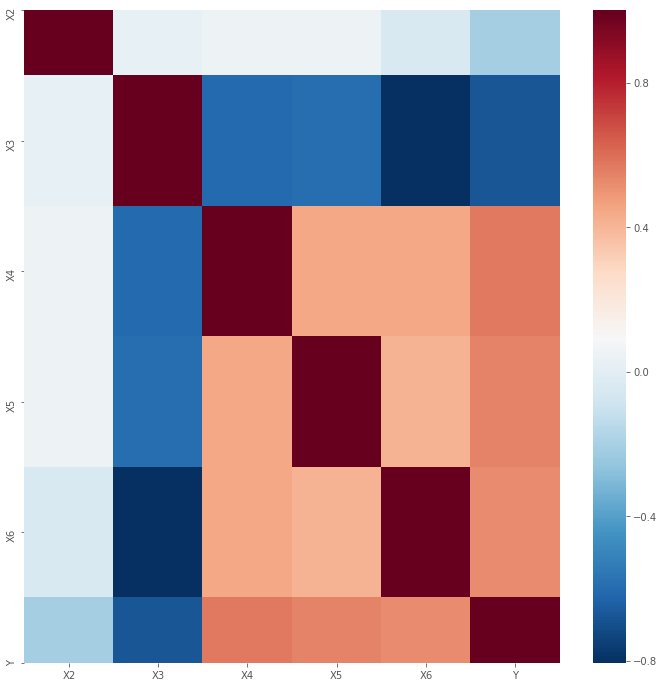

In [18]:
plt.figure(figsize=(12,12))
sns.heatmap(cdf.corr(),cmap='RdBu_r')

Dapat dilihat bahwa adanya korelasi yang cukup kuat (positif) ditunjukkan oleh variabel X4 lalu selanjutnya X5,X6 

dan korelasi yang cukup kuat (negatif) X3 dengan X6,X3,X4 dst. Untuk lebih jelas mengenai nilai korelasinya dapat dilihat pada gambar dibawah ini

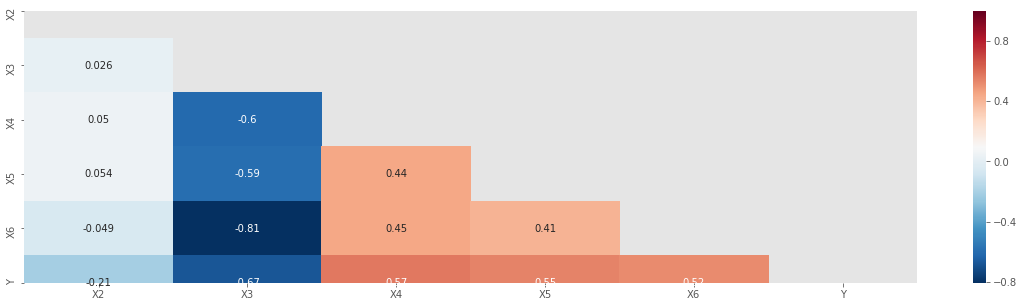

In [19]:
plt.figure(figsize=(20,5))
mask = np.zeros_like(cdf.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(cdf.corr(),cmap='RdBu_r',mask=mask, annot=True)

In [ ]:
##### selanjutnya kita bisa melakukan Train dan Test data yang memiliki korelasi

In [20]:
msk = np.random.rand(len(df_realestate)) < 0.8
train = cdf[msk]
test = cdf[~msk]

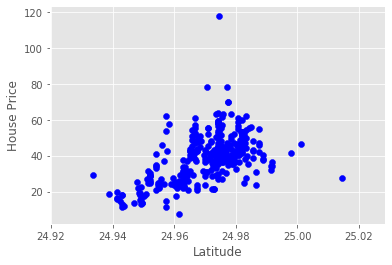

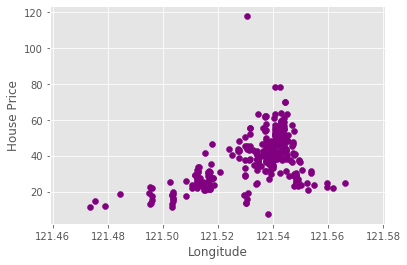

In [25]:
#Setelah sebelumnya kita melihat scatter plot untuk semua variabel dan Histogram untuk X5 dan X6 , hasilnya menunjukkan bahwa 
# (lanjutan) bahwa variabel X3,X5 dan X6 berkorelasi cukup baik dengan variabel Y , selanjutnya kita lakukan train dan test 
# (lanjutan2) untuk variabel X3,X5 dan X6
plt.scatter(train.X5, train.Y,  color='blue')
plt.xlabel("Latitude")
plt.ylabel("House Price")
plt.show()

plt.scatter(train.X6, train.Y,  color='purple')
plt.xlabel("Longitude")
plt.ylabel("House Price")
plt.show()

In [22]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['X5']])
train_y = np.asanyarray(train[['Y']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)



Coefficients:  [[616.76939873]]
Intercept:  [-15362.18060906]


dapat dilihat untuk nilai koefisien untuk variabel X5 adalah 616.76

In [23]:
# MAE dan MSE variabel yang berkorelasi
test_x = np.asanyarray(test[['X5']])
test_y = np.asanyarray(test[['Y']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))


Mean absolute error: 8.83
Residual sum of squares (MSE): 132.54


Untuk data X3

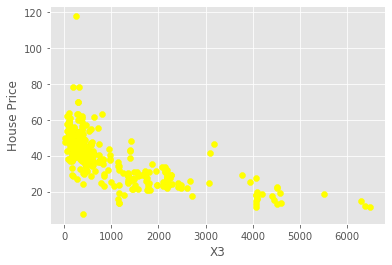

In [26]:
plt.scatter(train.X3, train.Y,  color='yellow')
plt.xlabel("X3")
plt.ylabel("House Price")
plt.show()

In [27]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['X3']])
train_y = np.asanyarray(train[['Y']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.00744581]]
Intercept:  [46.31331855]


In [28]:
test_x = np.asanyarray(test[['X3']])
test_y = np.asanyarray(test[['Y']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))


Mean absolute error: 7.70
Residual sum of squares (MSE): 101.12


#### Model Regression

In [29]:
import pandas as pd

In [30]:
cdf1=pd.DataFrame(df_realestate, columns= ['X1','X2','X3','X4','X5','X6','Y'])
Xb=cdf1.drop(['X1','Y'],axis=1)
Yb=cdf1['Y']

------- Kemudian kita Train dan Test data ( 80% Train set and 20% Test set) --------------

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
Xb_train, Xb_test, Yb_train, Yb_test=train_test_split(Xb,Yb)
from sklearn.linear_model import LinearRegression

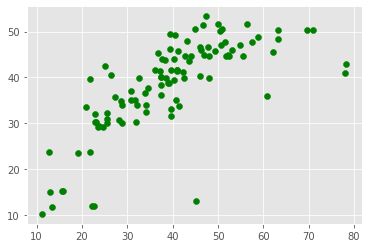

In [35]:
lm=LinearRegression()
lm.fit(Xb_train,Yb_train)
Ytopi=lm.predict(Xb_test)
plt.scatter(Yb_test,Ytopi, color ='green')
plt.show()

------------------------- Untuk melihat koefisien regresi -----------------------------

In [36]:
from sklearn import metrics

In [37]:
coeff_df = pd.DataFrame(lm.coef_, Xb.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
X2,-0.291000
X3,-0.004164
X4,1.004382
X5,286.232766
X6,-22.331505


Sehingga persamaan regresi yang kita peroleh 

Y= - 0.291 - 0.004 X3 + 1.004 X4 + 286.232 X5 - 22.331 X6

dengan 
Y adalah harga rumah 

X2 adalah usia rumah

X3 adalah jarak terdekat dari stasiun MRT

X4 adalah banyaknya toko

X5 adalah garis lintang

X6 adalah garis bujur

## Interpretasi Data:

Dari model diatas dapat disimpulkan bahwa 

1. jika usia rumah bernilai nol/tidak ada maka akan menurunkan harga rumah sebesar 0.291 dengan asumsi variabel lain konstan/tetap.

2. jika jarak terdekat naik satu satuan maka akan menurunkan harga rumah sebesar 0.004 dengan asumsi variabel lain konstan/tetap.

3. jika banyaknya toko naik satu satuan maka akan menaikkan harga rumah sebesar 1.004 dengan asumsi variabel lain konstan/tetap.

4. jika garis lintang naik satu satuan maka akan menaikkan harga rumah sebesar 286.232 dengan asumsi variabel lain konstan/tetap.

5. jika garis bujur naik satu satuan maka akan menurunkan harga rumah sebesar 22.331 dengan asumsi variabel lain konstan/tetap.





#### Nilai MSE,RMS dan Koefisien Determinasi


In [38]:
from sklearn import metrics

In [39]:
print('MSE= ', metrics.mean_squared_error(Yb_test,Ytopi))
print('RMS= ', np.sqrt(metrics.mean_squared_error(Yb_test,Ytopi)))
print('R2_score= ', metrics.r2_score(Yb_test,Ytopi))

MSE=  89.4609175381776
RMS=  9.458378166375967
R2_score=  0.5387062859247072



Dapat dilihat bahwa nilai MSE= 89.46 artinya bahwa besarnya kesalahan pendugaan/ramalan adalah 89.46 


R2_score = 0.54 artinya bahwa kemampuan variabel X dapat menjelaskan variabel Ynya adalah 0.54 dan sisanya yakni 0.46 dijelaskan oleh variabel lainnya.
